In [4]:
import pandas as pd
import numpy as np

# Implementation

## For submitting only the first 1000 rows have been included - everything below has been created with the full dataset - If you re-run the code with the reduced data, you will get results but they will be different

## Create Data Pipeline

In [5]:
import pandas as pd

In [6]:
interventions = pd.read_csv("data/sample_of_interventions.csv",names=[
"JobID"
,"CentralAssetID"
,"SiteID"
,"PlotNo"
,"AssetTypeID"
,"LogNo"
,"EntryDateTime"
,"Notes"
,"JobTypeID"
,"JobTypeCode"
,"JobTypeName"
,"JobStatusID"
,"FloodHotspot"
,"JobStatusName"
,"PriorityID"
,"PriorityName"
,"ActualStartingDateTime"
,"ActualCompletionDateTime"
,"ActualCompletionYearMonth"
,"RouteID"
,"ParameterTypeID"
,"ParameterValueID"
,"IsDeletedFlag"
,"IsCurrentFlag"
,"ValidFromDateTime"
,"ValidToDateTime"
,"InsertedDateTime"
,"JobItemID"
,"SorItemID"
,"ExtractTimestamp"],header=None,index_col=False)
def formatting_failure_vs_maintenance(string): 
    if string.find("B") != -1:
        return 1
    else:
        return 0

interventions["Failure_or_Maintenance"] = interventions["JobTypeCode"].apply(formatting_failure_vs_maintenance)

def create_prefix(siteid):
    return siteid[0:4]

interventions["prefix"] = interventions["SiteID"].apply(create_prefix)
interventions = interventions[(interventions["IsCurrentFlag"]==1)&(interventions["IsDeletedFlag"]==0)]
interventions = interventions.groupby(['JobID', 'CentralAssetID','EntryDateTime','Notes','FloodHotspot', 'JobStatusName', 'PriorityID',
       'PriorityName','ActualCompletionDateTime', 'RouteID', 'ParameterTypeID',
       'ParameterValueID', 'ExtractTimestamp', 'Failure_or_Maintenance','prefix'],as_index=False)["ValidFromDateTime"].max()
interventions.drop(columns="ValidFromDateTime",inplace=True)

In [167]:
interventions

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix
0,12000016,A12SDRGU00004594,2021-06-18 10:49:31.0000000,3 x blocked gully EB 1 x WB (DR: Blockage),0,Job Closed,24HR,24 Hours,2021-06-19 08:07:55.0000000,NO76,%FUL,7510,2023-06-26 13:52:59.520,1,NE12
1,12002351,A12GU00010060,2021-10-26 11:12:15.0000000,Sunken gully needs re-bedding to raise.,0,Job Closed,28DY,28 days,2021-11-09 04:03:52.0000000,NO96,%FUL,0-25,2023-06-26 13:52:59.520,1,NE12
2,12002726,A12GU00019535,2021-11-24 14:13:39.0000000,Gully grate collapsed lower than road (DR: Dra...,0,Work Complete,R,* Priority - Change Me,2021-11-24 14:18:34.0000000,NO87,%FUL,2550,2023-06-26 13:52:59.520,1,NE12
3,12002785,A12GU00011223,2021-11-29 12:23:36.0000000,1 sunken gully requires resetting in lane 1 M1...,0,Work Complete,28DY,28 days,2021-12-08 07:31:56.0000000,NO87,%FUL,NK,2023-06-26 13:52:59.520,1,NE12
4,12003189,A12GU00005763,2022-01-05 10:01:55.0000000,Clean test and prove gullies. Remove thermopla...,0,Work Complete,28DY,28 days,2022-07-26 01:01:43.0000000,NO41,%FUL,7510,2023-06-26 13:52:59.520,1,NE12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609965,58156832,DR/HEA10/DRGU/043718,2023-03-29 00:00:00.0000000,4.3.1.1 Clean/empty gullies - Central Reserve,0,Job Closed,2MTH,2 Month - Commit,2023-04-02 22:54:58.0000000,M128,%FUL,2550,2023-06-26 13:52:59.520,0,NW10
609966,58164776,DR/HEA10/DRGU/024921,2023-04-12 12:54:29.0000000,Please reset rocking gully in carriageway. (Dr...,0,Work Complete,2MON,2 Months,2023-04-21 13:02:46.0000000,M019,%FUL,0-25,2023-06-26 13:52:59.520,1,NW10
609967,58165003,DR/HEA10/DRGU/018579,2023-04-13 12:57:34.0000000,Reset wier gully lid (Drainage Defect),0,Work Complete,FNOW,Fix Now - Internal,2023-04-13 12:58:51.0000000,M015,%FUL,CLEA,2023-06-26 13:52:59.520,1,NW10
609968,59002076,DR/A09/GU/100156,2023-04-20 09:56:14.0000000,1x permanent repair required for collapsed gu...,0,Work Complete,3MON,3 Months,2023-04-15 00:00:00.0000000,A935,%FUL,NK,2023-06-26 13:52:59.520,1,MD09


In [168]:
reactive = interventions[interventions["Failure_or_Maintenance"]==1]

key_words_covered = ["covered","leaves","Covered","Leaves","Clear",
                     "clear","CLEAR","cleared","CLEARED","clearing",
                     "cleaning","top blocked","Cleaning","mouth","mouths",
                     "debris","Debris","swept","Sweep","SWEPT","SWEEP",
                     "sweep","uncover","Uncover","grate","Obstruction",
                     "obstructed","detritus","Detritus","DETRITUS",
                     "Free flow impeded","Fix now","leaf","leaves","Fall",
                     "fall","Clear blocked gully grating","clear covers",
                     "Clear gully cover","Blocked gully tops",
                     "Grass growing","mud","clean","free flow"]

key_words_full = ["empty","Empty","emptying","Emptying","gully cleaning",
                  "cleansing","cleaning out","jet","Jet","jetted","Jetted",
                  "Jetting","sucking","Sucking","sucker","SUCKER",
                 "sucked","Sucked","Suck","SUCK","suck","vac","blocked",
                  "Blocked","blockage","Blockage","unblock","Unblock",
                  "blocking","Blockage","Silt","silted","silt",
                  "Clean out gully","Flooding","flooding","filled","Soil", 
                  "Cleared","debris","Debris","clearing","detritus","cleaning",
                  "CLEARING","FLOOD","BLOCKED","Standing water","standing",
                  "Please clear 8 gullies","full of mud"]

key_words_broken = ["collapsing","sunken","Collapsing","Sunken","Reset",
                    "reset","re-setting","Broken","broken","replace",
                    "Replace","collapsed","Collapsed","COLLAPSED",
                    "pothole","Pothole","POTHOLE","RESET","fit","Fit",
                    "FIT","Adjust","ADJUST","adjust","repair","Repair",
                    "missing","Missing","replacing","Replace","REPLACE",
                    "REPLACING","cracked","Cracked","CRACKED","Sandbag",
                    "sandbag","Sandbags","SANDBAG","breaking","Breaking",
                    "dislodged","Dislodged","misaligned","Misaligned",
                    "degraded","Degraded","frame","Frame","Rattling",
                    "rattling","REPAIR","setting","Setting","re-set","Raise",
                    "Hole","hole","patch","Patch","damage","Damage","rocking",
                    "Rocking","sunk","Sunk","SUNK","CCTV","cctv","reseating",
                    "collapse","Reinstate","level with","Level with","unseize",
                    "seize","sieze","Unseize","Seize","broken",
                    "New gully lid required","no lid","No lid",
                    "lid open","Lid popped out","realingning",
                    "stick out","dislodge","Re-set"]

reactive["covered_key_word_count"] = 0
reactive["full_key_word_count"] = 0
reactive["broken_key_word_count"] = 0 
count = 0
for item in reactive["Notes"]:
    count += 1
    count_of_covered_key_words=0
    for key_word in key_words_covered:
        if item.find(key_word) != -1:
            count_of_covered_key_words += 1
    reactive.loc[reactive["Notes"] == item, "covered_key_word_count"] = count_of_covered_key_words

    count_of_full_key_words=0
    for key_word in key_words_full:
        if item.find(key_word) != -1:
            count_of_full_key_words += 1
    reactive.loc[reactive["Notes"] == item, "full_key_word_count"] = count_of_full_key_words
    
    count_of_broken_key_words=0
    for key_word in key_words_broken:
        if item.find(key_word) != -1:
            count_of_broken_key_words += 1
    reactive.loc[reactive["Notes"] == item, "broken_key_word_count"] = count_of_broken_key_words

    if count % 1000 == 0 :
        print(count)

1000
2000
3000
4000
5000


## Create Validation Columns

In [169]:
reactive["full_failure"] = reactive["full_key_word_count"]
reactive["covered_failure"] = reactive["covered_key_word_count"]
reactive["broken_failure"] = reactive["broken_key_word_count"]

## Apply validation rules

In [170]:
for index, row in reactive.iterrows():
    # When we have FNOW data we need to classify if it is covered or broken. It cannot be full.
    if row["covered_key_word_count"] > 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] > 0:
        reactive.loc[index, "full_failure"] = 0
    
    # This is to cover the blocked issue, blocked is a full keyword but in the case of Fix Now it acts as a covered key word
    if row["covered_key_word_count"] == 0 and row["PriorityID"]=='FNOW' and row["full_key_word_count"] > 0:
        reactive.loc[index, "covered_failure"] = 1 
        
    # This classifys broken fixnow jobs    
    if row["PriorityID"]=='FNOW' and row["broken_key_word_count"] > 0:
        reactive.loc[index, "broken_failure"] = 1
    
    # If we have missing data and we have confidence that the job is classifying full then we can assume it is between 75-100% full
    if row["full_key_word_count"] > 1 and row["PriorityID"]!='FNOW' and row["ParameterValueID"] == 'NK':
        reactive.loc[index,"ParameterValueID"] = '7510'
    
    # This is to change classifications from full to covered if the % full is not high. Similar words can be used for each 
    if row["full_key_word_count"] > 0 and row["ParameterValueID"] not in ('7510','NK'):
        reactive.loc[index, "full_failure"] = 0
        reactive.loc[index, "covered_failure"] = 1
    

In [171]:
def adjust_word_count_to_binary(x):
    if x > 1: 
        return 1 
    else:
        return x 
    
reactive["covered_failure"] = reactive["covered_failure"].apply(adjust_word_count_to_binary)
reactive["full_failure"] = reactive["full_failure"].apply(adjust_word_count_to_binary)
reactive["broken_failure"] = reactive["broken_failure"].apply(adjust_word_count_to_binary)

In [172]:
reactive.drop(columns=["covered_key_word_count","full_key_word_count","broken_key_word_count"],inplace=True)

In [173]:
cyclic = interventions[interventions["Failure_or_Maintenance"]==0]
cyclic["full_failure"] = 0
cyclic["covered_failure"] = 0
cyclic["broken_failure"] = 0

In [174]:
final_interventions = pd.concat([reactive,cyclic])

## Sense test below to randomly check the quality of the final classification

In [175]:
final_interventions[final_interventions["PriorityID"] == 'FNOW'][["prefix","JobID"]].groupby("prefix",as_index=False).count()

,prefix,JobID
0,EA68,510
1,MD07,86
2,MD09,186
3,NE12,10
4,NE14,34
5,NW10,2
6,NW13,2
7,SE04,55
8,SO03,82
9,SW21,546


In [176]:
testing = final_interventions

In [177]:
final_interventions[final_interventions["Failure_or_Maintenance"]==1].sample(n=25)

,JobID,CentralAssetID,EntryDateTime,Notes,FloodHotspot,JobStatusName,PriorityID,PriorityName,ActualCompletionDateTime,RouteID,ParameterTypeID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure
2687,40410072,DRGU/A04/P00002802,2021-11-10 11:12:25.0000000,Gullys blocked please clear (DR: Blockage) abo...,0,Work Complete,28DY,28 days,2022-01-13 19:41:54.0000000,4214,%FUL,5075,2023-06-26 13:52:59.520,1,SE04,0,1,0
482499,49157082,19002934,2022-10-14 12:38:46.0000000,1 x gully blocked/partially blocked by vegetat...,0,Substantiation Passed,28DY,28 days,2022-12-23 10:36:28.0000000,A919,%FUL,7510,2023-06-26 13:52:59.520,1,MD09,1,1,0
297264,43361848,A07DRGU/050737,2022-08-18 10:44:54.0000000,Pls replace broken gully lid and frame (Draina...,1,Post Compl Inspection Passed,28DY,28 days,2023-06-21 05:00:00.0000000,R23,%FUL,2550,2023-06-26 13:52:59.520,1,MD07,0,0,1
470835,46662295,A68DRGU/047738,2023-05-18 07:45:19.0000000,Replace 2 x broken / sunken gully covers and f...,1,Work Complete,28DY,28 days,2023-06-06 02:15:18.0000000,E037,%FUL,7510,2023-06-26 13:52:59.520,1,EA68,0,0,1
460652,46575647,A68DRGU/042670,2023-02-21 14:46:17.0000000,A14 westbound 52/7+80 in layby (Enquiry - 168...,0,Work Complete,28DY,28 days,2023-03-24 15:16:01.0000000,E083,%FUL,0-25,2023-06-26 13:52:59.520,1,EA68,0,1,1
153358,42161226,A21DRGU/005836,2020-01-20 10:41:28.0000000,Blocked gully (DR: Blockage),1,Work Complete,FNOW,Fix Now - Internal,2020-01-20 10:42:26.0000000,3803,%FUL,NK,2023-06-26 13:52:59.520,1,SW21,1,1,0
152975,42160059,A21DRGU/036234,2020-01-18 07:43:02.0000000,Clear 5 blocked gully tops (DR: Blockage),1,Work Complete,FNOW,Fix Now - Internal,2020-01-18 07:43:11.0000000,M507,%FUL,NK,2023-06-26 13:52:59.520,1,SW21,0,1,0
197,40327102,A03PO/DRGU097062,2023-01-12 11:19:37.0000000,Nearside gully blocked causing flood in live l...,1,Work Complete,28DY,28 days,2023-02-14 09:07:54.0000000,A350,%FUL,7510,2023-06-26 13:52:59.520,1,SO03,1,1,0
459430,46554639,A68DRGU/046390,2022-06-21 11:02:37.0000000,Instruction: Replacement of 1 x gully top Loca...,1,Work Complete,6MON,6 months,2022-08-01 12:43:47.0000000,E011,%FUL,7510,2023-06-26 13:52:59.520,1,EA68,0,0,1
191167,42273348,A21DRGU/047332,2020-08-18 11:06:00.0000000,All gully and V Channels blocked with straw an...,1,Work Complete,24HC,24 Hours - Commit,2020-08-19 21:01:22.0000000,M401,%FUL,0-25,2023-06-26 13:52:59.520,1,SW21,0,1,0


In [178]:
clearing = ["Clean","clean","Clear","clear","covers","Covers"]
emptying = ["Jetting","jetting","Emptying","emptying","Empty","empty"]

In [179]:
final_interventions.prefix.unique()

array(['NE12', 'SO03', 'SE04', 'NW10', 'NW13', 'NE14', 'MD07', 'SW21',
       'EA68', 'MD09', '2000', 'A21D'], dtype=object)

In [180]:
final_interventions[(final_interventions["prefix"] == 'NE14')&(final_interventions["Failure_or_Maintenance"]==0)].Notes.unique()

array([], dtype=object)

In [181]:
def add_prev_type_of_maintenance(interventions):
    
    clearing = ["Clean","clean","Clear","clear","covers","Covers"]
    emptying = ["Jetting","jetting","jet","Jet","Emptying","emptying","Empty","empty"]
    interventions["type_of_maintenance"] = ''

    for item in interventions[interventions["Failure_or_Maintenance"]==0]["Notes"].unique():
        clearing_words = 0
        emptying_words = 0
        for key_word in emptying:
            # Emptying
            if item.find(key_word) != -1:
                emptying_words +=1
                for clearing_word in clearing: 
                    # Emptying and Clearing
                    if item.find(clearing_word) != -1:
                        clearing_words +=1
                    else:
                        pass
            else:
                # Just Clearing
                for clearing_word in clearing: 
                    if item.find(clearing_word) != -1:
                        clearing_words +=1
                        
        if clearing_words > 0:
            if emptying_words >0:
                interventions.loc[interventions["Notes"] == item, "type_of_maintenance"] = "Emptying"
            else:
                interventions.loc[interventions["Notes"] == item, "type_of_maintenance"] = "Clearing"
        else:
            if emptying_words > 0:
                interventions.loc[interventions["Notes"] == item, "type_of_maintenance"] = "Emptying"
            else:
                interventions.loc[interventions["Notes"] == item, "type_of_maintenance"] = "Neither"
    interventions.reset_index(inplace=True)
    for index, row in interventions[interventions["Failure_or_Maintenance"]==1].iterrows():
        if row["PriorityID"] == 'FNOW':
            interventions.loc[index, "type_of_maintenance"] = 'Clearing'
        if row["covered_failure"] == 1 and row["full_failure"] == 0 and row["broken_failure"]==0: 
            interventions.loc[index, "type_of_maintenance"] = 'Clearing'        
    interventions.drop(columns=['index'],inplace=True)
    return interventions

## Add the same process as above to the reactive maintenance

In [182]:
final_interventions = add_prev_type_of_maintenance(final_interventions)

In [183]:
final_interventions[final_interventions["Failure_or_Maintenance"] == 0]["type_of_maintenance"].value_counts()

Emptying    454352
Clearing    150260
Neither         43
Name: type_of_maintenance, dtype: int64

In [184]:
final_interventions[final_interventions["Failure_or_Maintenance"] == 1]["type_of_maintenance"].value_counts()

            2705
Clearing    2610
Name: type_of_maintenance, dtype: int64

In [185]:
final_interventions.loc[final_interventions["type_of_maintenance"] == '',"type_of_maintenance"] = 'Emptying'

In [186]:
final_interventions["type_of_maintenance"].value_counts()

Emptying    457057
Clearing    152870
Neither         43
Name: type_of_maintenance, dtype: int64

In [187]:
final_interventions = final_interventions[final_interventions["type_of_maintenance"]!="Neither"]

In [188]:
final_interventions = final_interventions.drop(columns=["Notes","JobStatusName","PriorityID","PriorityName","ParameterTypeID","EntryDateTime"])

In [189]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
0,12000016,A12SDRGU00004594,0,2021-06-19 08:07:55.0000000,NO76,7510,2023-06-26 13:52:59.520,1,NE12,1,0,0,Emptying
1,12002351,A12GU00010060,0,2021-11-09 04:03:52.0000000,NO96,0-25,2023-06-26 13:52:59.520,1,NE12,0,0,1,Emptying
2,12002726,A12GU00019535,0,2021-11-24 14:18:34.0000000,NO87,2550,2023-06-26 13:52:59.520,1,NE12,0,1,1,Emptying
3,12002785,A12GU00011223,0,2021-12-08 07:31:56.0000000,NO87,NK,2023-06-26 13:52:59.520,1,NE12,0,0,1,Emptying
4,12003189,A12GU00005763,0,2022-07-26 01:01:43.0000000,NO41,7510,2023-06-26 13:52:59.520,1,NE12,1,0,1,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609964,58156828,DR/HEA10/DRGU/043753,0,2023-04-02 22:21:00.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609965,58156829,DR/HEA10/DRGU/043747,0,2023-04-02 22:37:09.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609966,58156830,DR/HEA10/DRGU/043748,0,2023-04-02 22:36:46.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
609967,58156831,DR/HEA10/DRGU/043746,0,2023-04-02 22:37:33.0000000,M128,2550,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying


In [190]:
final_interventions["ActualCompletionDateTime"] =  pd.to_datetime(final_interventions["ActualCompletionDateTime"])
final_interventions["ExtractTimestamp"] = pd.to_datetime(final_interventions["ExtractTimestamp"])

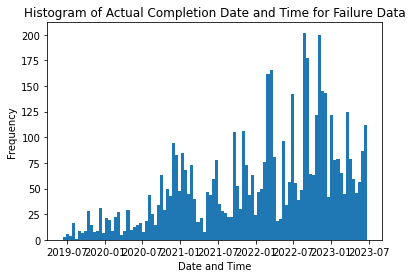

In [191]:
import matplotlib.pyplot as plt
failure = final_interventions[final_interventions["Failure_or_Maintenance"] == 1]
# Plot the histogram
plt.hist(failure['ActualCompletionDateTime'],bins=100)

# Adding labels and title
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Completion Date and Time for Failure Data')

# Display the plot
plt.show()

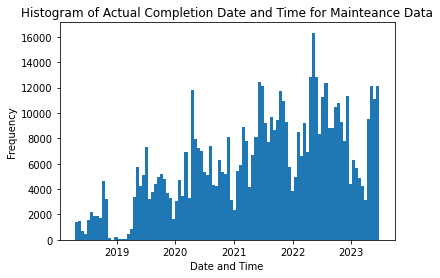

In [192]:
maintenance = final_interventions[final_interventions["Failure_or_Maintenance"] == 0]
# Plot the histogram
plt.hist(maintenance['ActualCompletionDateTime'],bins=100)

# Adding labels and title
plt.xlabel('Date and Time')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Completion Date and Time for Mainteance Data')

# Display the plot
plt.show()

In [193]:
from datetime import date
from dateutil.relativedelta import relativedelta
from dateutil import parser

In [194]:
final_interventions.sort_index(inplace=True)
final_interventions = final_interventions.sort_values(by=['ActualCompletionDateTime'], ascending=True)

In [195]:
final_interventions.sort_values(by='ActualCompletionDateTime', ascending = True)

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [196]:
data = final_interventions.groupby("CentralAssetID",as_index=False)["JobID"].count()

### Only keep assets which have had more than 1 interventions. We need this because we are having one intervention being one row. We need context to the failure or bit of maintenance. A failure on its own tells you little about the system

In [197]:
data = data[data["JobID"]>1]

In [198]:
final_interventions = final_interventions[final_interventions["CentralAssetID"].isin(data["CentralAssetID"])]

In [199]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [200]:
original = final_interventions.copy()

## To infill the NK values I have decided to infill the average wich is calculated below

In [135]:
number_of_cyc = final_interventions[["Failure_or_Maintenance"]].value_counts()[0]
number_of_react = final_interventions[["Failure_or_Maintenance"]].value_counts()[1]

In [136]:
number_of_cyc_nk = final_interventions[["ParameterValueID","Failure_or_Maintenance"]].value_counts().values[5]
number_of_react_nk = final_interventions[["ParameterValueID","Failure_or_Maintenance"]].value_counts().values[8]

In [137]:
print(f"Percentage of cyclic interventions that have nk as the percentage full value: {(number_of_cyc_nk/number_of_cyc)*100}%")

Percentage of cyclic interventions that have nk as the percentage full value: 3.3119306934309236%


In [138]:
print(f"Percentage of reactive interventions that have nk as the percentage full value: {(number_of_react_nk/number_of_react)*100}%")

Percentage of reactive interventions that have nk as the percentage full value: 19.598550320602172%


In [139]:
print(f"Percentage of interventions which are reactive: {(number_of_react/(number_of_cyc+number_of_react))*100}%")

Percentage of interventions which are reactive: 0.6507820451646731%


In [140]:
50,25,75,100,0
154369, 153412,  90727,  64192,  32711

(154369, 153412, 90727, 64192, 32711)

In [141]:
(50*154369 + 25*153412 + 75*90727 + 64192*100 + 32711*0)/(154369 + 153412 + 90727 + 64192 +32711)

50.01397829277105

In [164]:
final_interventions[final_interventions["Failure_or_Maintenance"]==1]

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_pvalue,Previous_type_of_maintenance
50321,41358396,DRGU/006167,1,2019-08-04 16:17:29,1101,7510,2023-06-26 13:52:59.520,1,NW13,1,0,0,293.0,0-25,Emptying
67816,42138878,A21DRGU/035544,0,2019-10-21 10:04:07,3035,7510,2023-06-26 13:52:59.520,1,SW21,1,0,0,0.0,0-25,Clearing
68163,42138882,A21DRGU/035543,1,2019-10-21 14:36:52,3035,CLEA,2023-06-26 13:52:59.520,1,SW21,0,1,1,0.0,0-25,Clearing
72206,42141148,A21DRGU/001909,1,2019-11-07 11:02:20,3801,7510,2023-06-26 13:52:59.520,1,SW21,1,1,0,44.0,2550,Emptying
72207,42141149,A21DRGU/001773,1,2019-11-07 11:05:55,3801,7510,2023-06-26 13:52:59.520,1,SW21,1,1,0,44.0,2550,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547717,40649690,DRGU/A04/P00023337,0,2023-06-16 04:27:19,4160,2550,2023-06-26 13:52:59.520,1,SE04,0,1,1,244.0,0-25,Emptying
547778,40527588,DRGU/A04/P00003057,0,2023-06-16 14:14:38,4195,7510,2023-06-26 13:52:59.520,1,SE04,1,0,1,287.0,CLEA,Emptying
549568,40644826,DRGU/A04/P00013160,0,2023-06-21 02:15:50,4159,2550,2023-06-26 13:52:59.520,1,SE04,0,0,1,203.0,0-25,Emptying
550247,46678033,A68DRGU/004846,1,2023-06-22 07:47:51,E069,0-25,2023-06-26 13:52:59.520,1,EA68,0,0,0,590.0,0-25,Emptying


In [165]:
final_interventions[final_interventions["Failure_or_Maintenance"]==0]

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,Days_Since_Maintenance,Previous_pvalue,Previous_type_of_maintenance
15458,41221402,DRGU/006174,0,2018-10-14 21:00:53,1101,0-25,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,0-25,Emptying
15460,41221449,DRGU/005032,0,2018-10-14 21:01:57,1101,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,2550,Emptying
15462,41221448,DRGU/003109,0,2018-10-14 21:02:39,1101,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,2550,Emptying
15464,41221401,DRGU/006175,0,2018-10-14 21:03:48,1101,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,2550,Emptying
15466,41260170,DRGU/006497,1,2018-10-14 21:05:11,1101,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,0.0,2550,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551178,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,258.0,2550,Emptying
551179,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,258.0,2550,Emptying
551180,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,262.0,5075,Clearing
551181,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,262.0,5075,Clearing


In [161]:
import random
def replace_nk(row):
    x= random.randint(0,1)
    if (row["ParameterValueID"] == 'NK')&(row["full_failure"]==1):
        return '7510'
    elif row["ParameterValueID"] == 'NK':
        if x == 1:
            return '2550'
        if x ==0:
            return '5075'
    else:
        return row["ParameterValueID"]

In [158]:
final_interventions["ParameterValueID"] = final_interventions.apply(lambda x: replace_nk(x) ,axis=1)

In [145]:
final_interventions

,JobID,CentralAssetID,FloodHotspot,ActualCompletionDateTime,RouteID,ParameterValueID,ExtractTimestamp,Failure_or_Maintenance,prefix,full_failure,covered_failure,broken_failure,type_of_maintenance
61076,41221299,DRGU/015494,0,2018-04-16 21:08:14,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61047,41221270,DRGU/015493,0,2018-04-16 21:10:56,1301,2550,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61084,41221307,DRGU/015193,0,2018-04-16 21:14:07,1301,5075,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61105,41221328,DRGU/015581,0,2018-04-16 21:17:23,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
61063,41221286,DRGU/015097,0,2018-04-16 21:21:25,1301,7510,2023-06-26 13:52:59.520,0,NW13,0,0,0,Emptying
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367248,45649817,DR/HEA10/DRGU/000995,0,2023-06-24 02:42:17,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
367246,45649815,DR/HEA10/DRGU/000828,0,2023-06-24 02:43:03,M016,7510,2023-06-26 13:52:59.520,0,NW10,0,0,0,Emptying
574129,54202385,A21DRGU/077908,1,2023-06-24 02:58:40,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying
574255,54202649,A21DRGU/077907,1,2023-06-24 02:58:50,M501,2550,2023-06-26 13:52:59.520,0,SW21,0,0,0,Emptying


In [146]:
import warnings
warnings.filterwarnings("ignore")  # silence warnings
from datetime import date
from dateutil.relativedelta import relativedelta
from dateutil import parser
import datetime
start_time = datetime.datetime.now()

# I want to identify the 
final_interventions[["ActualCompletionDateTime", "ExtractTimestamp"]] = final_interventions[["ActualCompletionDateTime", "ExtractTimestamp"]].apply(pd.to_datetime)
final_interventions.sort_values(by='ActualCompletionDateTime', inplace=True, ascending = True)
output = {"Days_Since_Maintenance":[],"JobID":[],'Previous_pvalue':[],'Previous_type_of_maintenance':[]}
for name, group in final_interventions.groupby("CentralAssetID"):
    times = group["ActualCompletionDateTime"]
    jobs = group["JobID"]
    pvalues = group["ParameterValueID"]
    types_of_maintenance = group["type_of_maintenance"]
    start = 0 
    for time, job, pvalue,type_of_maintenance in zip(times,jobs,pvalues,types_of_maintenance):
        if start == 0:
            previous = time
            start = 1
            prev_pvalue = pvalue
            prev_type_of_maintenance = type_of_maintenance
        else:
            diff = time - previous
            output["Days_Since_Maintenance"].append(diff)
            output["JobID"].append(job)
            output["Previous_pvalue"].append(prev_pvalue)
            output["Previous_type_of_maintenance"].append(prev_type_of_maintenance)
            prev_type_of_maintenance = type_of_maintenance
            prev_pvalue = pvalue
            previous = time

output = pd.DataFrame(output)
output["Days_Since_Maintenance"] = output["Days_Since_Maintenance"].apply(lambda x: x.days)
final_interventions = pd.merge(final_interventions,output,how="left",on="JobID")
final_interventions = final_interventions[~final_interventions["Days_Since_Maintenance"].isna()]

end_time = datetime.datetime.now()
print(end_time-start_time)

0:00:21.983890


In [147]:
final_interventions.drop(columns=['type_of_maintenance'],inplace=True)

## Investigate data distribution between regions

In [148]:
final_interventions.prefix.value_counts()

SW21    141253
NW13    120936
NW10     75395
EA68     47719
SE04     24511
MD09      2117
NE12       938
SO03       177
2000       105
MD07        74
NE14        21
Name: prefix, dtype: int64

In [149]:
final_interventions[["prefix","Failure_or_Maintenance"]].value_counts()

prefix  Failure_or_Maintenance
SW21    0                         140562
NW13    0                         120896
NW10    0                          75359
EA68    0                          47003
SE04    0                          24076
MD09    0                           1702
NE12    0                            932
EA68    1                            716
SW21    1                            691
SE04    1                            435
MD09    1                            415
SO03    0                            154
2000    0                            105
MD07    1                             74
NW13    1                             40
NW10    1                             36
SO03    1                             23
NE14    1                             21
NE12    1                              6
dtype: int64

### As you can see the following Prefixes do not have any cyclic maintenance, this will highly skew the data. The prefixes are: NE14, MD07, 2000. They will be removed

In [152]:
final_interventions = final_interventions[final_interventions["prefix"].isin(["SW21","NW13","NW10","EA68","SE04"])]

In [153]:
final_interventions.prefix.value_counts()

SW21    141253
NW13    120936
NW10     75395
EA68     47719
SE04     24511
Name: prefix, dtype: int64

In [154]:
final_interventions.RouteID.value_counts()

1305    10723
1803     8779
M502     8187
1812     7532
M501     7268
        ...  
E090        1
E018        1
4228        1
E012        1
E017        1
Name: RouteID, Length: 516, dtype: int64

In [155]:
final_interventions.to_csv("../new_approach_data.csv")

## End of pipeline

In [118]:
final_interventionsinal_interventions.groupby("CentralAssetID").filter(lambda group: group.size > 5)

In [134]:
failure_count = 0
maintenance_count = 0
names = []
for name, group in final_interventions.groupby("CentralAssetID"):
    if len(group) >5:
        for index, row in group.iterrows():
            if row["Failure_or_Maintenance"] == 1:
                failure_count +=1
                names.append(name)
            else:
                maintenance_count +=1

In [132]:
failure_count

591

In [133]:
maintenance_count

156816

In [143]:
names = list(set(names))

Each row is an intervention and failure or not should be used (this might just be full,covered or broken)

it has information on whether it failed in the previous 6 months or the previous year
it has information on when it was last maintained

### For cyclic maintenance activities I want to keep the ActualCompletionDateTime as the only date. 
### For Reactive maintenance activities I want to keep the first instance of it as that is the first date when the failure was realised
### If one value of the % full values is null then we need to infill that as it should be the same as its one asset and one intervention -- SOLVED -- Turns out IsCurrentFlag was set to 0 for some causing duplicates - Solved with the line below 

### If 'cyclic' interventions are performed at random, then you can simply compare the outcomes of 'cyclic' intervention versus the outcomes of 'reactive' intervention over a fixed period of time that would be meaningful. The plot below shows that there is more cyclic maintenance in the spring summer and autumn months compared to the winter months. It could be valuable to add a "Season" variable

<AxesSubplot: xlabel='ActualCompletionDateTime'>

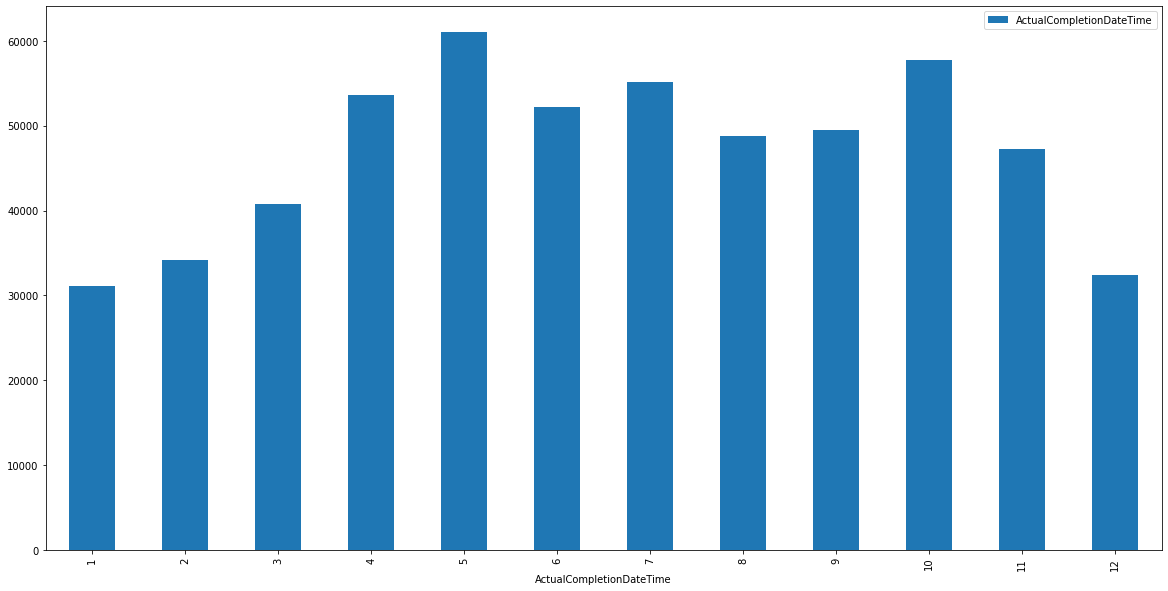

In [407]:
import matplotlib.pyplot as plt 
x = interventions[interventions["Failure_or_Maintenance"]==0][["ActualCompletionDateTime"]]
x["ActualCompletionDateTime"] = x["ActualCompletionDateTime"].astype("datetime64")
x.groupby(x["ActualCompletionDateTime"].dt.month).count().plot(kind="bar",figsize=(20,10))

### Import Meaning of the Percentage Full Parameter Values

### Full drains can be verified by the percentage full numbers